In [21]:
exp_name_postfix = "miss_text_s9"

### Proposal

In [22]:
import re
import pandas as pd
import os

exp_name = "proposal_" + exp_name_postfix
# Path to the log file
log_folder = '../pool_size'
log_file_path = os.path.join(log_folder, exp_name + '.log')

# Read the log file
with open(log_file_path, 'r') as file:
    log_data = file.read()

try:
    # Regular expressions to find round numbers and temp values
    round_pattern = r"Round\s+(\d+)"
    temp_pattern = r"Temp\s+(\d+)"

    # Find all occurrences of round numbers and temperatures
    round_matches = re.findall(round_pattern, log_data)
    temp_matches = re.findall(temp_pattern, log_data)

    # Create a DataFrame to store round numbers and temperature values
    df_round_temp = pd.DataFrame({
        'Round Number': round_matches,
        'Temp Value': temp_matches[:len(round_matches)]  # Pair temp values up to the number of rounds found
    }).astype({'Round Number': int, 'Temp Value': int})
except Exception as e:
    pattern = r"(?:^|\n)(.*?)(?:\n.*?INFO Time Cost)"

    # Extract all preceding lines that might contain the desired metric
    matches = re.findall(pattern, log_data)

    # Create a DataFrame with round numbers and the extracted preceding values
    # Here we assume round numbers should align by sequence if they were previously detected
    df_round_temp = pd.DataFrame({
        'Round Number': round_matches[:len(matches)],  # To match pairs by sequence as closely as possible
        'Temp Value': matches
    })


# Save the DataFrame to a CSV file
# output_csv_path = '../pool_size/proposal_miss_text_s9.csv'
output_csv_path = os.path.join(log_folder, exp_name + '.csv')
df_round_temp.to_csv(output_csv_path, index=False)

print(f"CSV file has been saved to {output_csv_path}")


CSV file has been saved to ../pool_size/proposal_miss_text_s9.csv


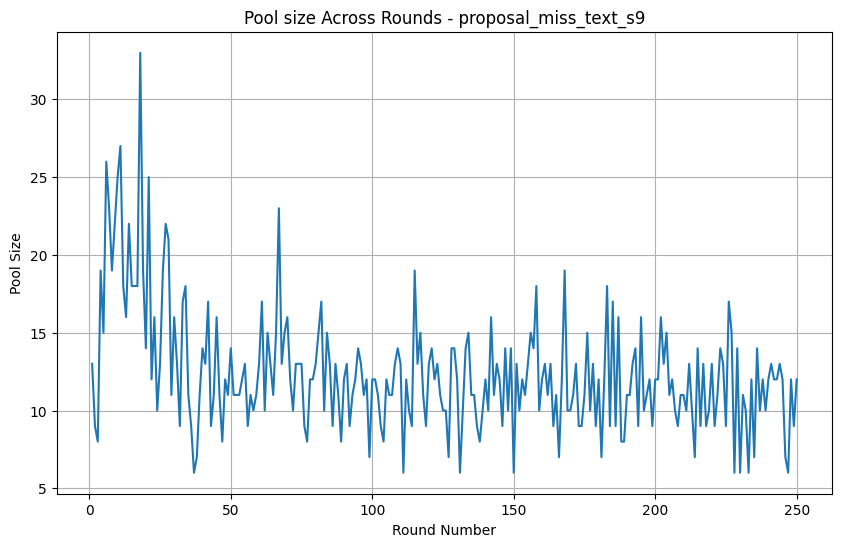

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv(os.path.join(log_folder, exp_name + '.csv'))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Round Number'], data['Temp Value'], linestyle='-')
plt.xlabel('Round Number')
plt.ylabel('Pool Size')
plt.title('Pool size Across Rounds - ' + exp_name)
plt.grid(True)
plt.savefig(os.path.join(log_folder, exp_name + '.png'))
plt.show()


### Prob_prompt

In [24]:
import re
import pandas as pd

exp_name = "prob_" + exp_name_postfix
# Path to the log file
log_folder = '../pool_size'
log_file_path = os.path.join(log_folder, exp_name + '.log')

# Read the log file
with open(log_file_path, 'r') as file:
    log_data = file.read()

# We will search for lines with "Time Cost" and extract the number from the line just before each "Time Cost" line.
# This should help identify the temperature (or similar metric) if it's consistently logged right before time cost.

try:
    # Regular expressions to find round numbers and temp values
    round_pattern = r"Round\s+(\d+)"
    temp_pattern = r"Temp\s+(\d+)"

    # Find all occurrences of round numbers and temperatures
    round_matches = re.findall(round_pattern, log_data)
    temp_matches = re.findall(temp_pattern, log_data)

    # Create a DataFrame to store round numbers and temperature values
    df_round_temp = pd.DataFrame({
        'Round Number': round_matches,
        'Temp Value': temp_matches[:len(round_matches)]  # Pair temp values up to the number of rounds found
    }).astype({'Round Number': int, 'Temp Value': int})
except Exception as e:
    pattern = r"(?:^|\n)(.*?)(?:\n.*?INFO Time Cost)"

    # Extract all preceding lines that might contain the desired metric
    matches = re.findall(pattern, log_data)

    # Create a DataFrame with round numbers and the extracted preceding values
    # Here we assume round numbers should align by sequence if they were previously detected
    df_round_temp = pd.DataFrame({
        'Round Number': round_matches[:len(matches)],  # To match pairs by sequence as closely as possible
        'Temp Value': matches
    })
    

# Save the DataFrame to a CSV file
output_csv_path = os.path.join(log_folder, exp_name + '.csv')
df_round_temp.to_csv(output_csv_path, index=False)

print(f"CSV file has been saved to {output_csv_path}")


CSV file has been saved to ../pool_size/prob_miss_text_s9.csv


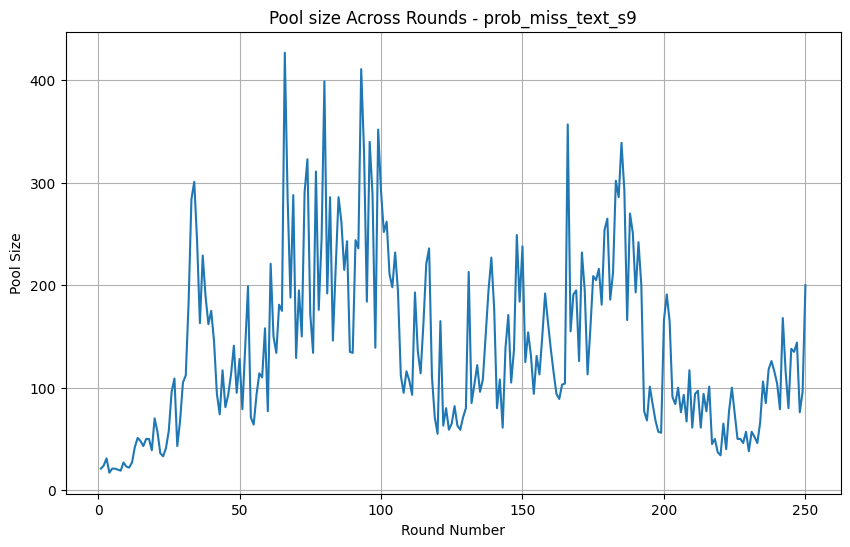

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv(os.path.join(log_folder, exp_name + '.csv'))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Round Number'], data['Temp Value'], linestyle='-')
plt.xlabel('Round Number')
plt.ylabel('Pool Size')
plt.title('Pool size Across Rounds - ' + exp_name)
plt.grid(True)
plt.savefig(os.path.join(log_folder, exp_name + '.png'))
plt.show()
